In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')

In [2]:
m=500
#print(np.random.randn(m,1))
#print(np.random.rand(m,1))
#print(np.random.randint(m))

In [3]:
x=6*np.random.rand(m,1)-3
y=0.5*x**2+x+2+np.random.randn(m,1)

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)
x_test=sorted(x_test,reverse=False)

In [5]:
def poly_reg(x_new,i):
    poly_features=PolynomialFeatures(degree=i,include_bias=False)
    x_poly=poly_features.fit_transform(x_new)
    return x_poly

In [6]:
def reg(i):
    slr=LinearRegression()
    slr.fit(poly_reg(x_train,i),y_train)
    y_pred=slr.predict(poly_reg(x_test,i))
    plt.figure(figsize=(10,6))
    plt.scatter(x,y,color='red',marker='*',s=100)
    plt.plot(x_test,y_pred,marker='o',color='green')
    plt.show()

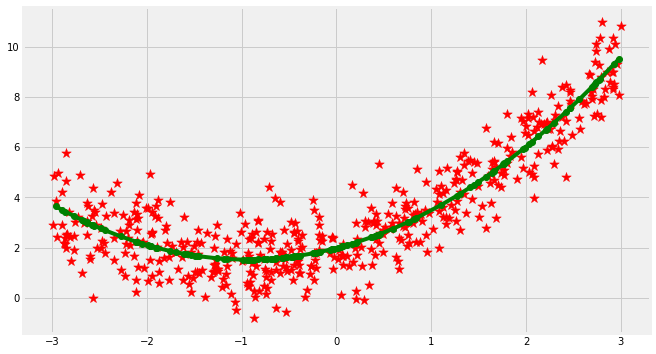

In [7]:
reg(2)

    degree -----> 2


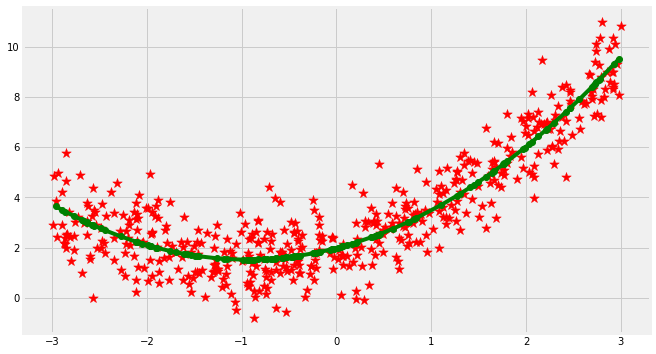

    degree -----> 3


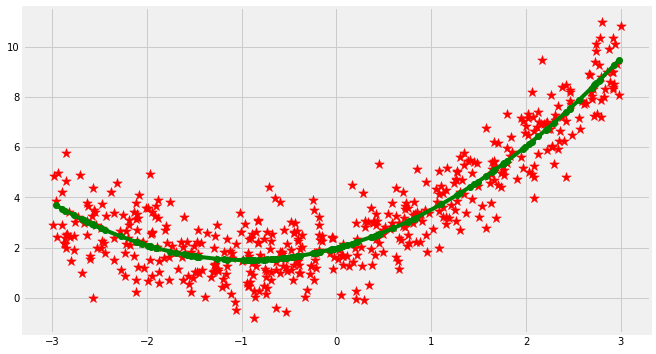

    degree -----> 4


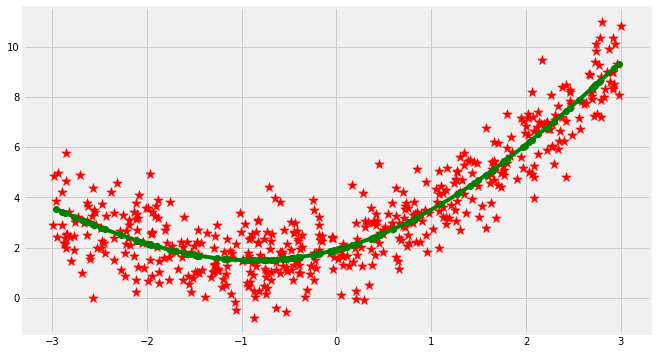

    degree -----> 5


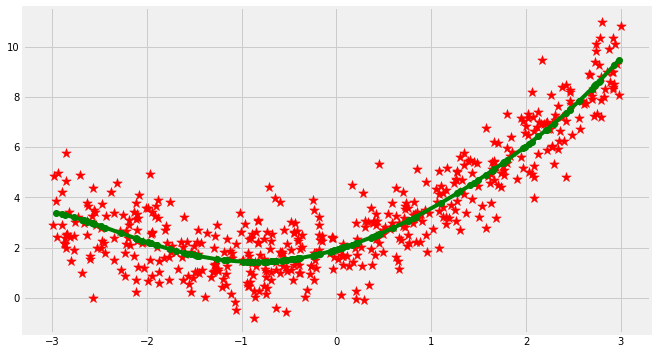

    degree -----> 6


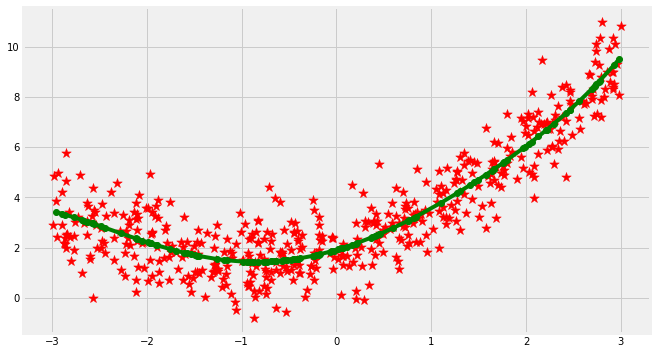

    degree -----> 7


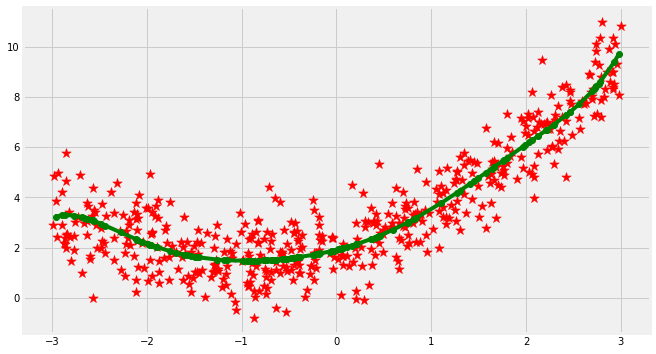

    degree -----> 8


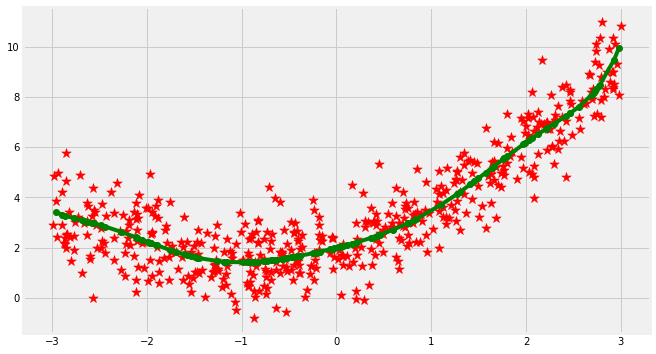

    degree -----> 9


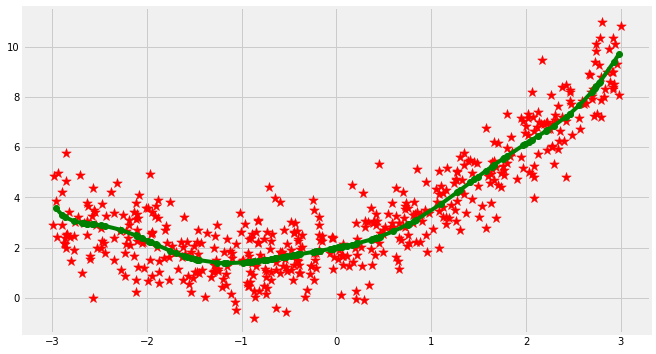

    degree -----> 10


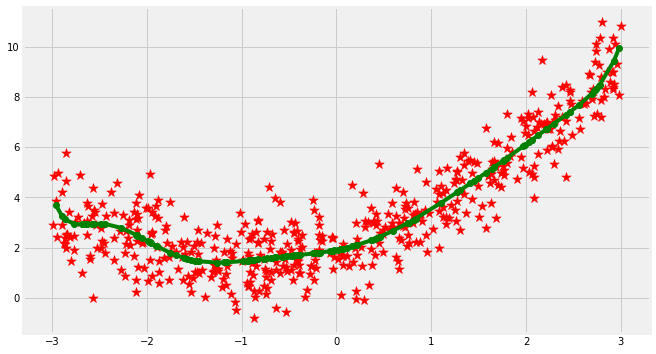

    degree -----> 11


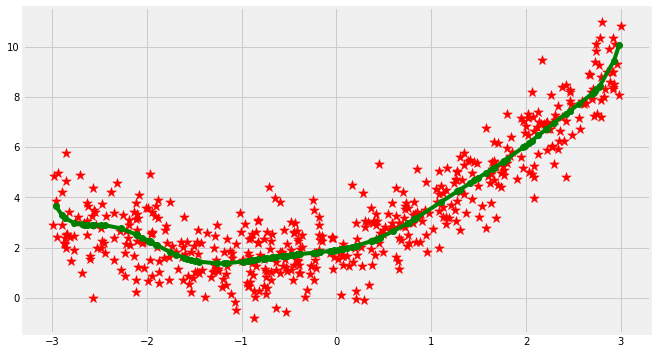

    degree -----> 12


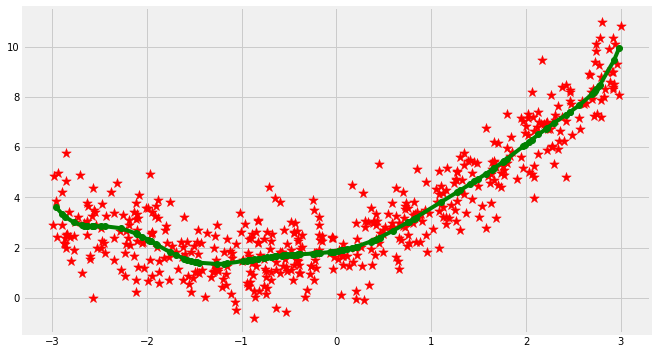

    degree -----> 13


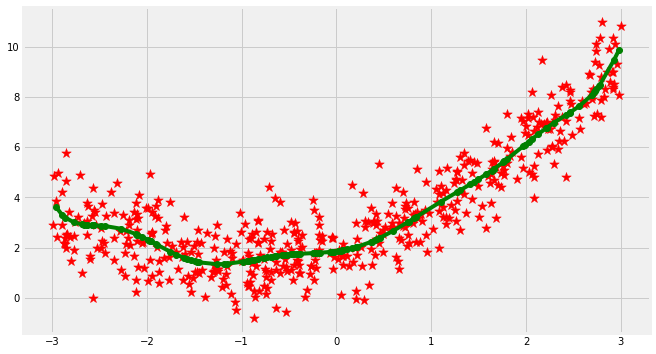

    degree -----> 14


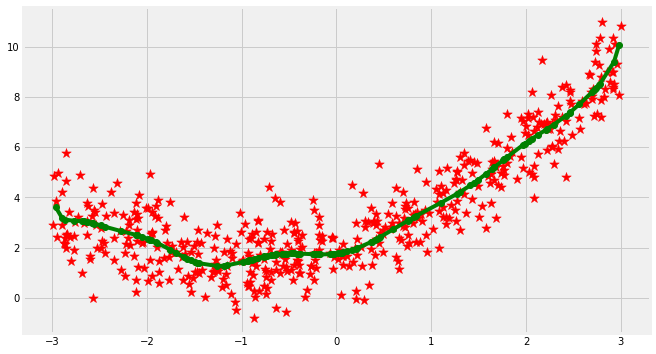

    degree -----> 15


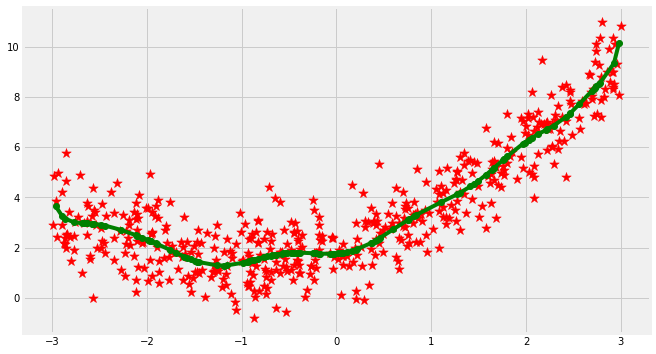

    degree -----> 16


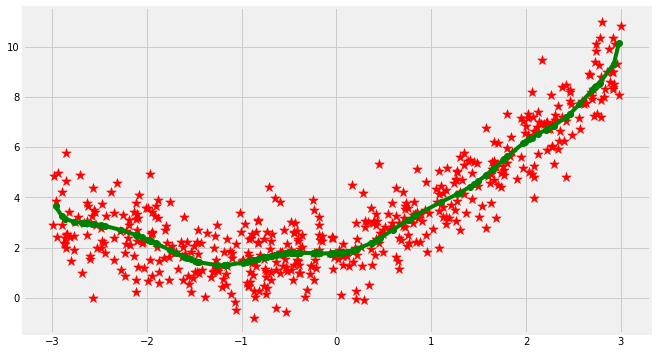

    degree -----> 17


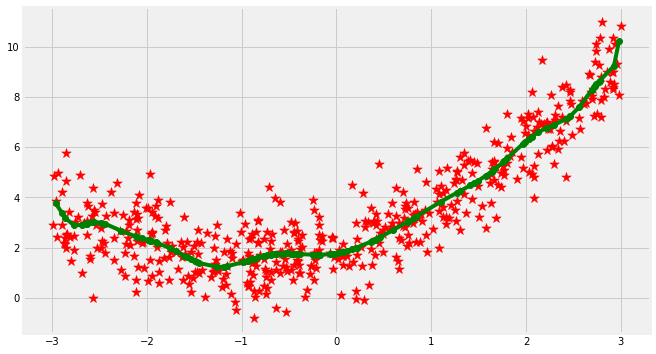

    degree -----> 18


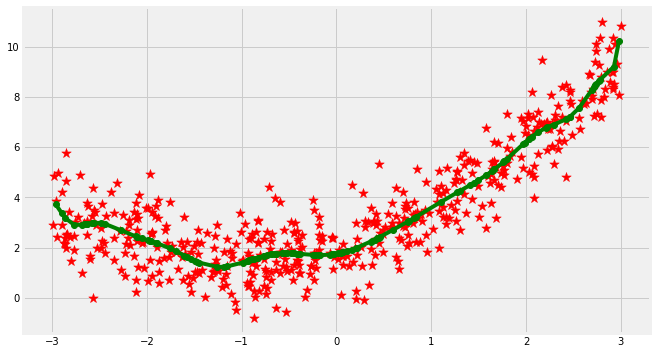

    degree -----> 19


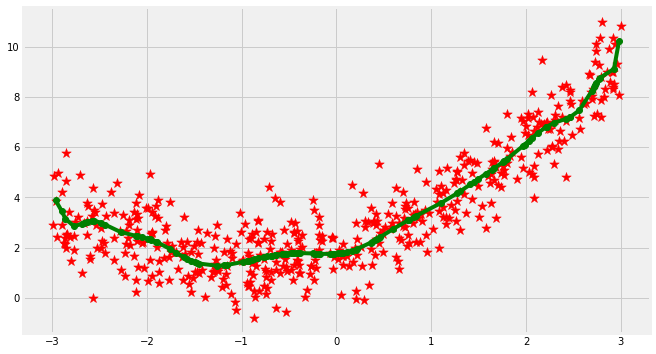

    degree -----> 20


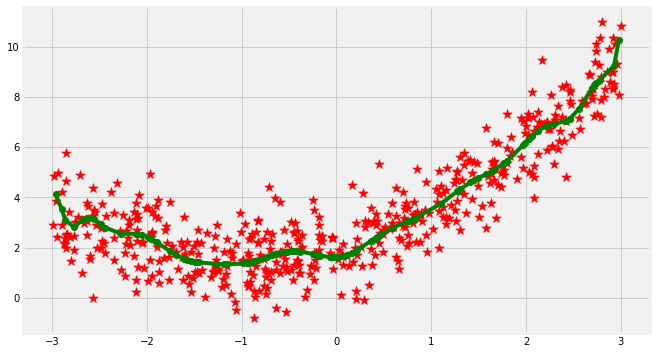

    degree -----> 21


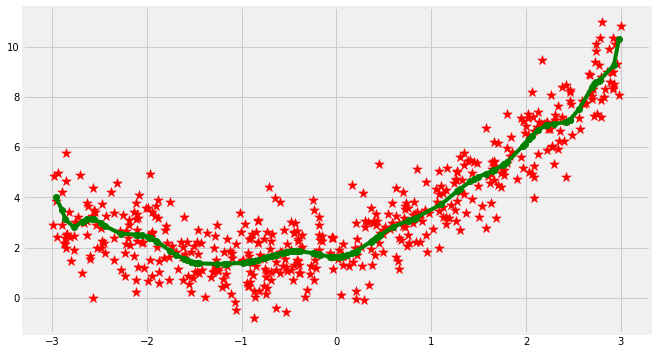

    degree -----> 22


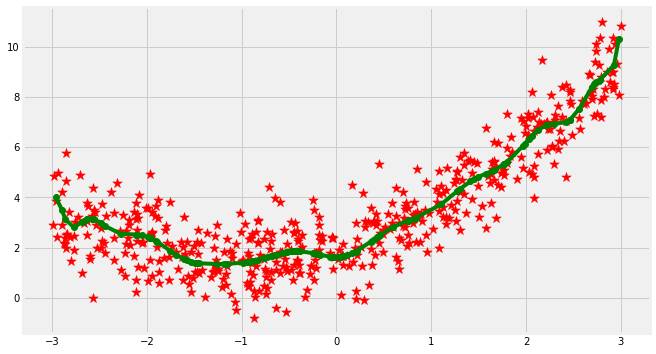

    degree -----> 23


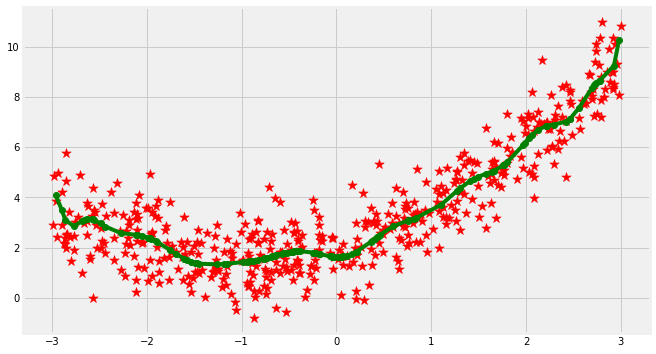

    degree -----> 24


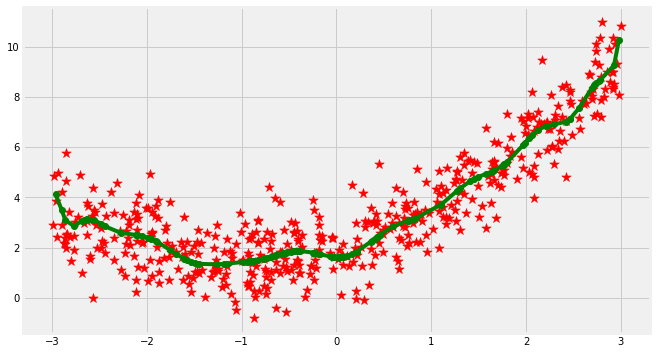

In [8]:
for i in range(2,25):
    print(f"    degree -----> {i}")
    reg(i)

# Learning Curve

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

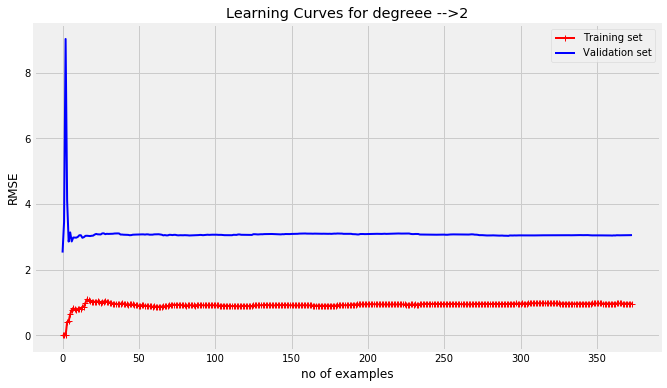

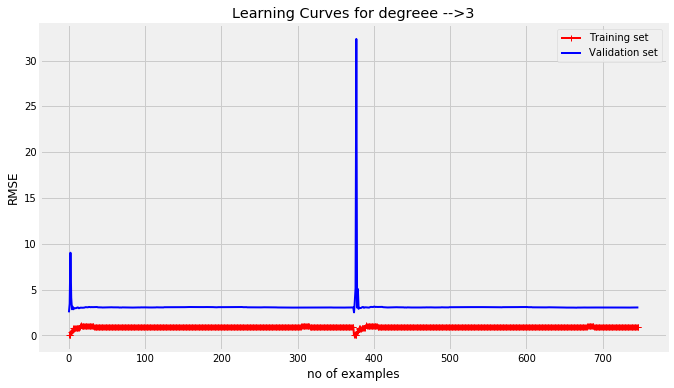

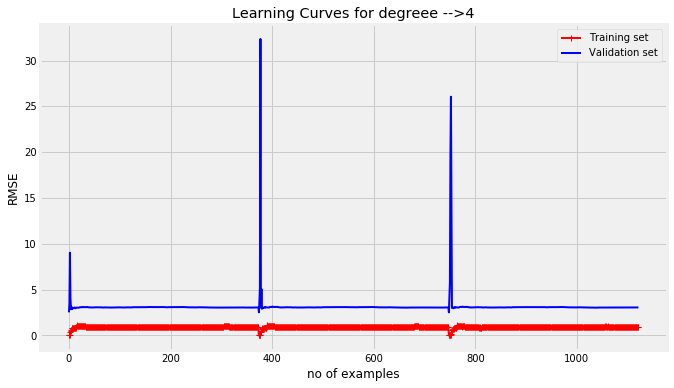

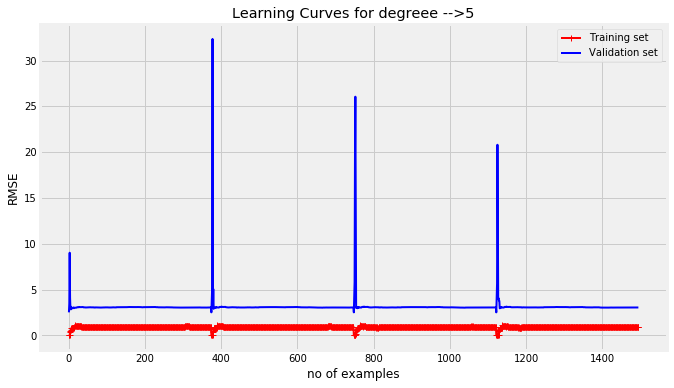

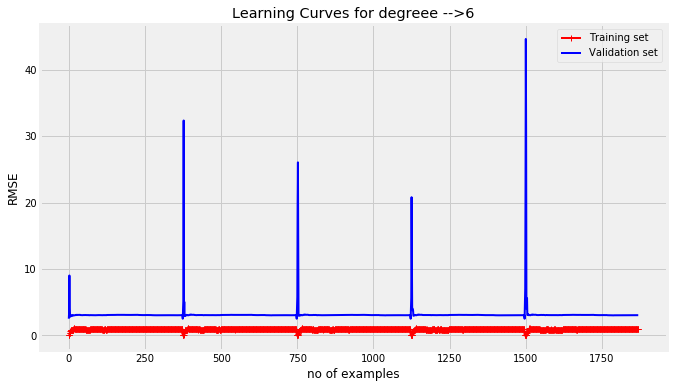

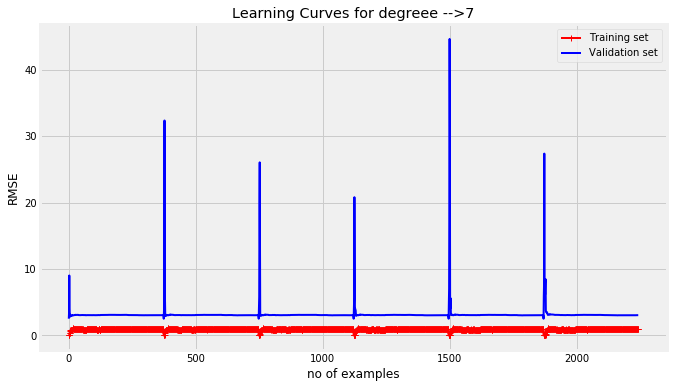

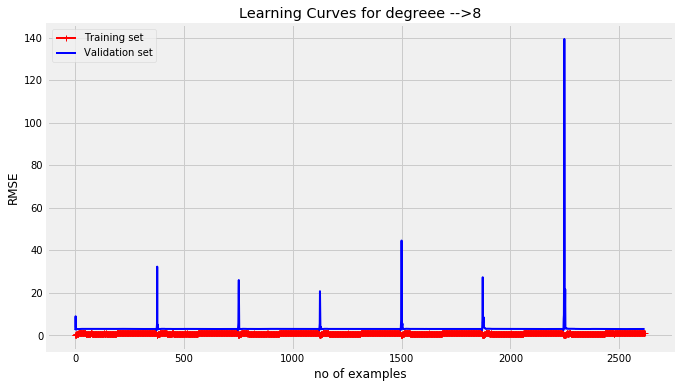

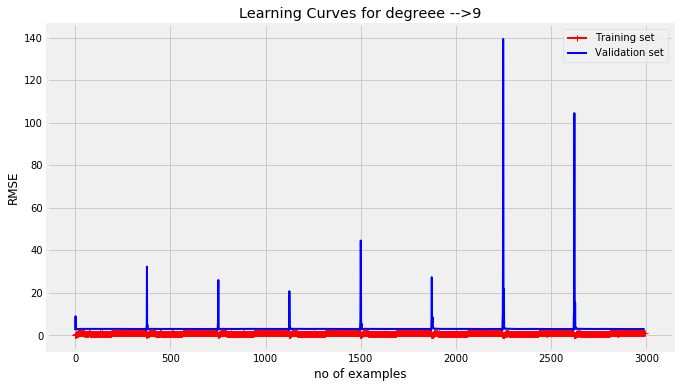

In [10]:
train_error,validation_error=[],[]
ival=[2,3,4,5,6,7,8,9]
i=0
for j in range(2,10):
    for i in range(1,len(y_train)):
        x_train_f,y_train_f=x_train[0:i],y_train[0:i]
        model=make_pipeline(PolynomialFeatures(degree=j,include_bias=False),LinearRegression())
        model.fit(x_train_f,y_train_f)
        y_val_predict=model.predict(x_test)
        y_train_predict=model.predict(x_train[0:i])
        train_error.append(mean_squared_error(y_train[0:i],y_train_predict))
        validation_error.append(mean_squared_error(y_test,y_val_predict))
    plt.figure(figsize=(10,6))
    plt.plot(np.sqrt(train_error),"r-+",linewidth=2,label="Training set")
    plt.plot(np.sqrt(validation_error),"b-",linewidth=2,label="Validation set")
    plt.ylabel("RMSE")
    plt.xlabel("no of examples")
    plt.title(f"Learning Curves for degreee -->{j}")
    plt.legend()
    plt.show()